# Bayesian Linear Regression

**Author: Khal Makhoul, W.P.G.Peterson**

**_Revised: Jessica Cervi_**

**Expected time = 3 hours**

**Total points = 90 points**
  

## Assignment Overview

This assignment will test your abilities in two different parts. In the first part,  we will revisit Bayes' formula and evaluate your ability to calculate simple Bayesian posterior probabilities. In the second part, we will ask you to build functions that calculate the parameters of Bayesian posteriors for Bayesian Linear Regression. 

This assignment is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the assignment, answers will get increasingly complex. It is important that you adopt a data scientist's mindset when completing this assignment. **Remember to run your code from each cell before submitting your assignment.** Running your code beforehand will notify you of errors and give you a chance to fix your errors before submitting it. You should view your Vocareum submission as if you are delivering a final project to your manager or client. 

***Vocareum Tips***
- Do not add arguments or options to functions unless asked specifically. This will cause an error in Vocareum.
- Do not use a library unless asked explicitly in the question. 
- You can download the Grading Report after submitting the assignment. It will include the feedback and hints on the incorrect questions. 


### Learning Objectives 

- Test the fundamental Bayesian knowledge, particularly regarding Linear Regression
- List the components of Bayesian theorem 
- Compute the posterior probabilities 
- Determine the regression coefficients using the Maximum A Posterior (MAP) inference 
- Estimate the covariants and the noise in data 
- Predict the continuous target using Bayesian models 



## Index: 

#### Bayesian Linear Regression  

- [Question 1](#q1)
- [Question 2](#q2)
- [Question 3](#q3)
- [Question 4](#q4)
- [Question 5](#q5)
- [Question 6](#q6)
- [Question 7](#q7)
- [Question 8](#q8)
- [Question 9](#q9)

## Bayesian Linear Regression


In statistics, Bayesian linear regression is an approach that takes on the statistical analysis within the context of Bayesian inference. Bayesian Regression comes with a different toolset than ordinary Linear Regression. Therefore, for this reason, it demands a slightly different mindset.


For example, in Bayesian statistical inference, the **prior probability** distribution, often known as the prior, is an important concept. The prior of an uncertain quantity is the probability distribution that would express one's beliefs about this quantity without considering any evidence. 
For example, we can calculate the prior by surveying people and asking them two questions (What's your age?; Do you watch YouTube every day?), then tabulating the percentage of each age group that watches YouTube every day.


To better understand this, we will start with a simple example to highlight how Bayesian thinking proceeds.

Consider a population whose age distribution is as follows:

| Age group | $\%$ of total population   |
|------|------|
|   $\le 35$  | $25 \%$|
| $36-65$ | $45 \%$ |
| $\ge 66$ | $30 \%$|

Say, you know the following results of a study about YouTube viewing habits:

| Age group | $\%$ in this group that watch YouTube every day  |
|------|------|
|   $\le 35$  | $90 \%$|
| $36-65$ | $50 \%$  |
| $\ge 66$ | $10 \%$ |

**Question: If you know a user watches YouTube every day, what is the probability that they are under 35?**


We will start with a prior, then update that prior using the likelihood and the normalization from Bayes's formula. We define the following notation:

* $A$: YouTube watching habit
* $B$: Age
* $A = 1$: User watches YouTube every day 
* $A = 0$: User does not watch YouTube every day
* $B \le 35$: User has age less than 36
* $36 \le B \le 65$: User has age between 36 and 65
* $B \ge  66$: User has age greater than 65

The prior can be read from the first table: 

$$P(B \le 35) = 0.25$$

We can translate the question asked in this exercise into a mathematical language by calculating the posterior probability:

$$P(B \le 35|A = 1)$$

by using **Bayes's formula**:

$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}.$$

Then, for our question, we obtain:

$$P(B \le 35|A=1) = \frac{P(A=1|B \le 35)*P(B \le 35)}{P(A=1)}$$  

Where, observe that, although the tables do not contain the value of $P(A=1)$, we can calculate it as follows:  

$$P(A=1) =  P(A=1| B\le 35)*P(B\le 35) \ +  P(A=1|35<B<65)* P(35<B<65)\  +  P(A=1|B\ge 65)*P(B\ge 65)$$



[Back to top](#Index:) 
<a id='q1'></a>

### Question 1:

*5 points*

In the example above, P(A=1|B<35) is the:
- a) prior
- b) liklihood
- c) nomalization
- d) posterior

Assign the character associated with your choice as string to `ans1`.

In [1]:
### GRADED

### YOUR SOLUTION HERE
ans1 = None

###
### YOUR CODE HERE
###
ans1 = 'b'

In [2]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q2'></a>

### Question 2:

*5 points*

Given the values in the tables above, calculate the posterior probability:

"If you know a user watches Youtube every day, what is the probability that they are under 35?"

Assign float to `ans2`. Note that because we are computing a probability, your answer should take a value between 0 and 1.

In [3]:
### GRADED

### YOUR SOLUTION HERE

ans2 = None

###
### YOUR CODE HERE
###
ans2 = 0.46875

In [4]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q3'></a>

### Question 3:

*10 points*

Code a function called `calc_posterior`. Your function should accept three inputs: the likelihood and the prior as floats and one list of tuples. Each tuple should contain two values $P(B)$ and $P(A|B)$.

You may assume that the list of tuples accounts for all potential values of B and that those values of B are all mutually exclusive.

Your function should return a float corresponding to the posterior probability.

In [5]:
### GRADED


### YOUR SOLUTION HERE
def calc_posterior(likelihood, prior, norm_list):
    """
    Calculate the posterior probability given likelihood,
    prior, and normalization
    
    Positional Arguments:
        likelihood -- float, between 0 and 1
        prior -- float, between 0 and 1
        norm_list -- list of tuples, each tuple has two values
            the first value corresponding to the probability of a value of "b"
            the second value corresponding to the probability of 
                a value of "a" given that value of "b"
    Example:
        likelihood = .8
        prior = .3
        norm_list = [(.25 , .9), (.5, .5), (.25,.2)]
        print(calc_posterior(likelihood, prior, norm_list))
        # --> 0.45714285714285713
    """
    marginal = sum((x * y) for x, y in norm_list)
    posterior = (likelihood * prior) / marginal
    return posterior

###
### YOUR CODE HERE
###


In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Importing the data set and exploratory data analysis

For this assignment, we will use a regression model on a housing price dataset to predict house price using above-ground living area. More information about this dataset can be found [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).  

Before coding an algorithm, we will take a look at our data using `Python`'s `pandas`. For visualizations, we will use `matplotlib`.

Let's import the necessary libraries and load the datasets. We will be using using the pandas `pd.read_csv()` function. 

In [7]:
###Importing the necessary libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)  

In [8]:
### Read in the data
data = pd.read_csv('./data/train.csv')  

We begin by performing some basic exploratory data analysis by using the function `head()`.

In [9]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Next, let's plot the relationship between our variables of interest: the price for each house and the above-ground living area in square feet.

We can do so by creating a scatter plot using `matplotlib`. 

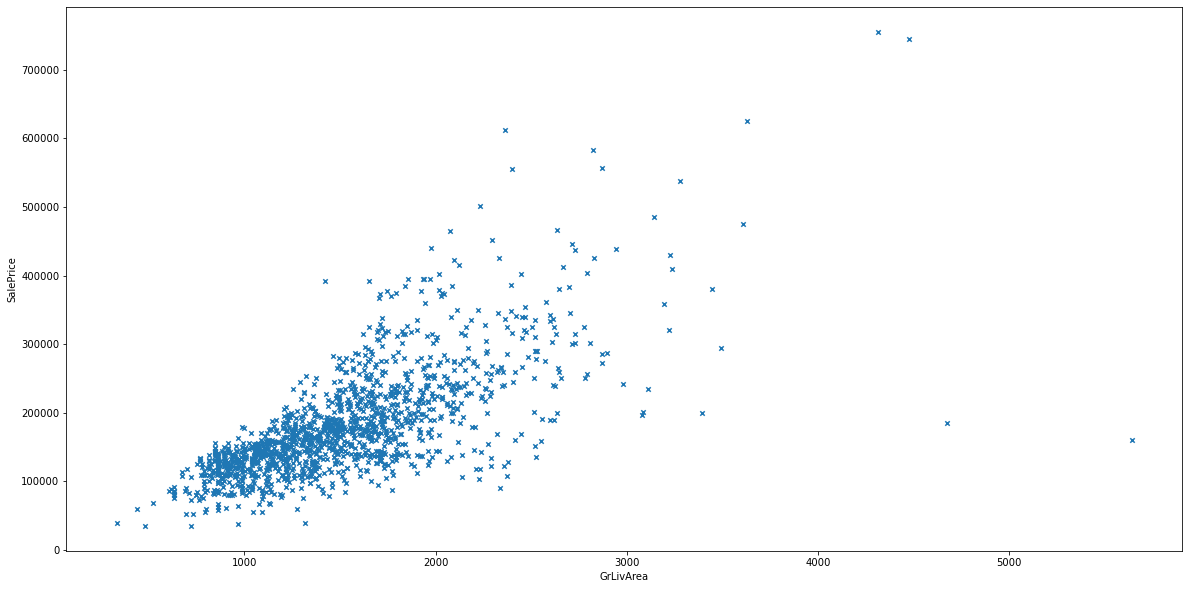

In [10]:
data.plot('GrLivArea', 'SalePrice', kind = 'scatter', marker = 'x');

For this assignment, we are also interested in predicting the price for each house based on the year each house was built. Again, we use `matplotlib` to create a scatter plot of these two variables.


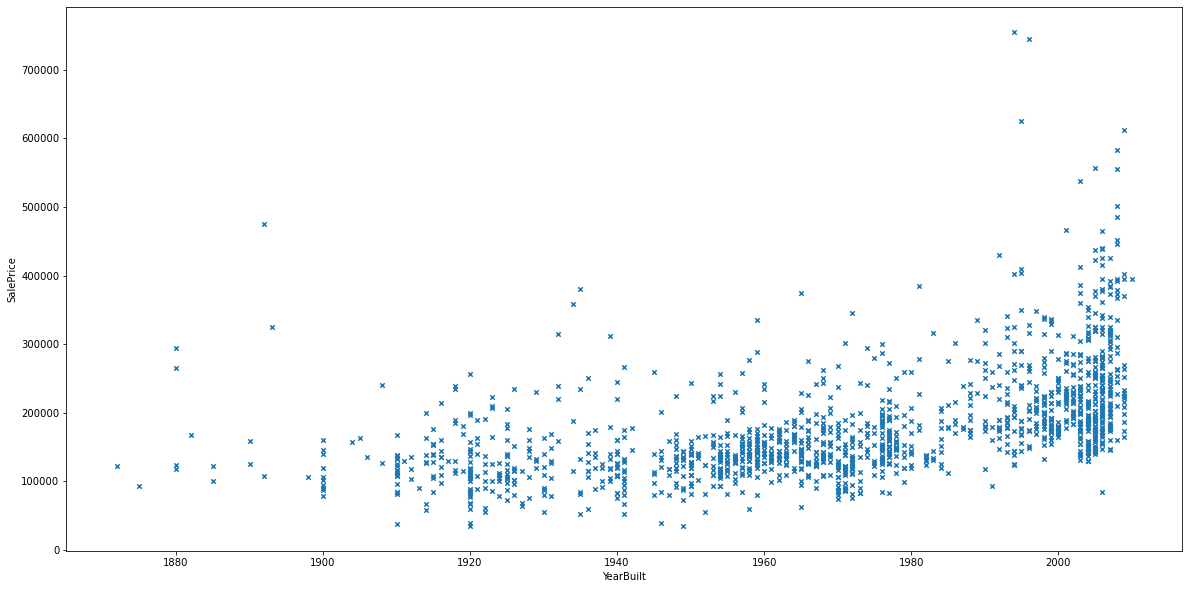

In [11]:
data.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'x');

## Coding Bayesian Linear Regression

In lecture, we obtained the equation for the posterior probability of $w$, the linear regression parameter vector:

$$p(w|y, X) = N(w|\mu, \Sigma)$$

Where,

$$\Sigma = (\lambda \ I + \sigma^{- 2}\ X^T\ X)^{−1}$$

$$w_{MAP} = (\lambda \ \sigma^2 I + X^T\ X)^{-1}\ X^T y $$



Recall that $\sigma^2$ is a parameter characterizing the deviation of the data from the line defined by $Xw$. While we don't know the true underlying parameter, we can estimate it by using the empirical deviation:

$$\sigma^2  = \frac{1}{n − d}\sum_{i=1}^n ( y_i − X_i w )^2$$  
Where $w$ in the above line is the $w_{LeastSquares} = (X^T\ X)^{-1}\ X^T y$

When it comes to make the prediction, we can use the following formulas:

$$p( y_0|x_0,y,X) = N(y_0|\mu_0,\sigma^2_0)$$  

$$\mu_0 = x^T_0\mu$$

$$ \sigma^2_0 = \sigma^2 + x_0^T\Sigma x_0$$





[Back to top](#Index:) 
<a id='q4'></a>

### Question 4:

*10 points*

In this question, we will start defining the functions to compute Bayesian linear regression from scratch. The first step we need to do, is to prepare our matrix of inputs `X`. This is similar to what we have done in the previous assignments about linear regression and Ridge regression.

Define the function called `x_preprocess` that takes, as input, a one- or two-dimensional `NumPy` array. If input is two dimensional, make sure there are more rows than columns.
Your function should prepend a column of ones to `X` for the intercept term and return that array.

In [12]:
### GRADED

### YOUR SOLUTION HERE
def x_preprocess(input_x):
    """
    Reshape the input (if needed), and prepend "1" to each observation
    
    Positional Argument:
        input_x -- a NumPy array, one- or two-dimensional
    
    Example:
        input1 = np.array([[2,3,6,9],[4,5,7,10]])
        input2 = np.array([2,3,6])
        input3 = np.array([[2,4],[3,5],[6,7],[9,10]])
        
        for i in [input1, input2, input3]:
            print(x_preprocess(i), "\n")
            
        # -->[[ 1.  2.  4.]
              [ 1.  3.  5.]
              [ 1.  6.  7.]
              [ 1.  9. 10.]] 

            [1 2 3 6] 

            [[ 1.  2.  4.]
             [ 1.  3.  5.]
             [ 1.  6.  7.]
             [ 1.  9. 10.]] 

    Assumptions:
        Assume that if the input is two dimensional, the observations are more numerous
            than the features. Thus, the observations should be the rows, and features the columns
    """
    if len(input_x.shape) > 1:
        if input_x.shape[0] < input_x.shape[1]:
            input_x = input_x.T
        ones_vector = np.ones((input_x.shape[0], 1))
        aug_x = np.concatenate((ones_vector, input_x), axis = 1)
        
    else:
        ones_vector = np.ones(1)
        aug_x = np.concatenate((ones_vector, input_x), axis = 0)
        
    return aug_x

###
### YOUR CODE HERE
###



In [13]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q5'></a>

### Question 5:

*10 points*

In this question, we will calculate the Maximum A Posteriori (MAP) weights according to the formula:

$$w_{MAP} = (\lambda \ \sigma^2 I + X^T\ X)^{-1}\ X^T y. $$ 

Define the function called `calculate_map_coefficients` that takes the four inputs: two numpy arrays- an X-matrix and y-vector; two positive numbers- the $\lambda$ parameter and value for $\sigma^2$. Your function should return a one-dimensional `NumPy` vector of weights that are computed using the formula given above.

Again, you may assume that your X-matrix has been preprocessed in such a way that it should prepend a column of ones, the observations are in the rows, and the features are in the columns.


**NOTE:** The functions `.shape`, `np.matmul`, `np.linalg.inv`, `np.ones`, `np.identity`, and `np.transpose` will be valuable.

In [14]:
### GRADED

### YOUR SOLUTION HERE

def calculate_map_coefficients(aug_x, output_y, lambda_param, sigma_squared):
    """
    Calculate the maximum a posteriori LR parameters
    
     Positional arguments:
        aug_x -- x-matrix of training input data, augmented with column of 1's
        output_y -- vector of training output values
        lambda_param -- positive number; lambda parameter that
            controls how heavily to penalize large coefficient values
        sigma_squared -- data noise estimate
        
    Example:
        output_y = np.array([208500, 181500, 223500, 
                             140000, 250000, 143000, 
                             307000, 200000, 129900, 
                             118000])
                             
        aug_x = np. array([[   1., 1710., 2003.],
                           [   1., 1262., 1976.],
                           [   1., 1786., 2001.],
                           [   1., 1717., 1915.],
                           [   1., 2198., 2000.],
                           [   1., 1362., 1993.],
                           [   1., 1694., 2004.],
                           [   1., 2090., 1973.],
                           [   1., 1774., 1931.],
                           [   1., 1077., 1939.]])
                           
        lambda_param = 0.01
        
        sigma_squared = 1000
        
        map_coef = calculate_map_coefficients(aug_x, output_y, 
                                             lambda_param, sigma_squared)
                                             
        ml_coef = calculate_map_coefficients(aug_x, output_y, 0,0)
        
        print(map_coef)
        # --> np.array([-576.67947107   77.45913349   31.50189177])
        
        print(ml_coef)
        #--> np.array([-2.29223802e+06  5.92536529e+01  1.20780450e+03])
        
    Assumptions:
        -- output_y is a vector whose length is the same as the
        number of rows in input_x
        -- aug_x has more observations than it does features.
        -- lambda_param has a value greater than 0
    
    """
    
    
    lambda_matrix = np.identity(aug_x.shape[1]) * lambda_param
    
    sigma_matrix = np.identity(aug_x.shape[1]) * sigma_squared
    
    I = np.identity(aug_x.shape[1])
    
    term_1 = np.matmul(np.matmul(lambda_matrix, sigma_matrix), I)
    
    term_2 = np.matmul(aug_x.T, aug_x)
    
    term_3 = np.linalg.inv(term_1 + term_2)
    
    coefs = np.matmul(term_3, np.matmul(aug_x.T, output_y))
    
    #coefs = np.array([])
    
    return coefs

###
### YOUR CODE HERE
###


In [15]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q6'></a>

### Question 6:

*10 points*

Next, we will calculate the empirical data noise estimate according to the formula:

$$\sigma^2 = \frac{1}{n − d}\Sigma_{i=1}^n ( y_i − X_i w )^2$$  

Define the function called `esimate_data_noise` that takes, three inputs: three `NumPy` arrays - One matrix corresponding to the augmented X-matrix and the two vectors- the y-target and the MAP weights.

Your function should return the empirical data noise estimate, $\sigma^2$, calculated with the equation given above.

**Note:** In the formula above, "n" is the number of observations in X (rows) and "d" is the number of features in aug_x (columns). 

In [16]:
### GRADED


### YOUR SOLUTION HERE

def estimate_data_noise(aug_x, output_y, weights):
    """Return empirical data noise estimate \sigma^2
    Use the LR weights in the equation supplied above
    
    Positional arguments:
        aug_x -- matrix of training input data
        output_y -- vector of training output values
        weights -- vector of LR weights calculated from output_y and aug_x
        
        
    Example:
        output_y = np.array([208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000])
        aug_x = np. array([[   1., 1710., 2003.],
                           [   1., 1262., 1976.],
                           [   1., 1786., 2001.],
                           [   1., 1717., 1915.],
                           [   1., 2198., 2000.],
                           [   1., 1362., 1993.],
                           [   1., 1694., 2004.],
                           [   1., 2090., 1973.],
                           [   1., 1774., 1931.],
                           [   1., 1077., 1939.]])
        
        ml_weights = calculate_map_coefficients(aug_x, output_y, 0, 0)
        
        print(ml_weights)
        # --> [-2.29223802e+06  5.92536529e+01  1.20780450e+03]
        
        sig2 = estimate_data_noise(aug_x, output_y, ml_weights)
        print(sig2)
        #--> 1471223687.1593
        
    Assumptions:
        -- aug_x has more observations than it does features.
        -- output_y is a vector whose length is the same as the
        number of rows in training_x
    """
    
    
    n, d = aug_x.shape
    
    term = (1 / (n - d))
    
    ml_weights = calculate_map_coefficients(aug_x, output_y, 0, 0)
    
    Xw = np.matmul(aug_x, ml_weights)
    
    summation = sum([(y - x)**2 for y, x in zip(output_y, Xw)])
    
    data_noise = term * summation
    
    return data_noise

###
### YOUR CODE HERE
###


In [17]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q7'></a>

### Question 7:

*10 points*

In this question, we will calculate the covariance matrix of the posterior according to the formula:


$$\Sigma = (\lambda \ I + \sigma^{- 2}\ X^T\ X)^{−1}.$$

Define the function called `calc_post_cov_mtx` that takes three inputs: one `NumPy` array for the augmented x-matrix;
two floats for $\sigma^2$ and $\lambda$.
Your function should return the covariance matrix of the posterior computed using the equation given above.

In [18]:
### GRADED


### YOUR SOLUTION HERE
def calc_post_cov_mtx(aug_x, sigma_squared, lambda_param):
    """
    Calculate the covariance of the posterior for Bayesian parameters.
    
    Positional arguments:
        aug_x -- matrix of training input data; preprocessed
        sigma_squared -- estimation of sigma^2
        lambda_param -- lambda parameter that controls how heavily
        to penalize large weight values
        
    Example:
        output_y = np.array([208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000])
        aug_x = np. array([[   1., 1710., 2003.],
                           [   1., 1262., 1976.],
                           [   1., 1786., 2001.],
                           [   1., 1717., 1915.],
                           [   1., 2198., 2000.],
                           [   1., 1362., 1993.],
                           [   1., 1694., 2004.],
                           [   1., 2090., 1973.],
                           [   1., 1774., 1931.],
                           [   1., 1077., 1939.]])
        lambda_param = 0.01
        
        ml_weights = calculate_map_coefficients(aug_x, output_y,0,0)
        
        sigma_squared = estimate_data_noise(aug_x, output_y, ml_weights)
        
        print(calc_post_cov_mtx(aug_x, sigma_squared, lambda_param))
        # --> [[ 9.99999874e+01 -1.95016334e-02 -2.48082095e-02]
               [-1.95016334e-02  6.28700339e+01 -3.85675510e+01]
               [-2.48082095e-02 -3.85675510e+01  5.10719826e+01]]

    Assumptions:
        -- aug_x is a vector whose length is the same as the
        number of rows in training_x
        -- lambda_param has a value greater than 0
    
    """
    weights = calculate_map_coefficients(aug_x, output_y, lambda_param, sigma_squared)
    
    sigma_squared = estimate_data_noise(aug_x, output_y, weights)
    
    lambda_matrix = np.identity(aug_x.shape[1]) * lambda_param
    
    #sigma_matrix = np.identity(aug_x.shape[1]) * sigma_squared
    
    sigma_matrix_inverse = 1 / estimate_data_noise(aug_x, output_y, weights)
    
    
    #term_1 = np.matmul(lambda_matrix, np.identity(aug_x.shape[1]))
    term_1 = np.matmul(lambda_matrix, np.identity(aug_x.shape[1]))
    
    #term_2 = np.matmul(sigma_matrix_inverse, np.matmul(aug_x.T, aug_x))
    term_2 = sigma_matrix_inverse * np.matmul(aug_x.T, aug_x)
    
    term_3 = term_1 + term_2
    
    big_sigma = np.linalg.inv(term_3)
    
    return big_sigma

###
### YOUR CODE HERE
###


In [19]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


So far, we have coded the functions for

$$w_{map}=(\lambda\ \sigma^2 I+X^TX)^{-1}X^Ty$$
and

$$\Sigma = (\lambda \ I + \sigma^{- 2}\ X^T\ X)^{−1}.$$


Therefore, the posterior distribution of the linear regression parameters, $p(w|y, X) = N(w|\mu, \Sigma)$,  may be described.


[Back to top](#Index:) 
<a id='q8'></a>

### Question 8:

*10 points*


Recall that, when we want to predict an unknown value, $y_0$, given observations $x_0$, the  point estimate $\mu_0$, and variance for the prediction for x $\sigma^2_0$ can be computed via 

$$\mu_0 = x^T_0\mu$$

$$\sigma^2_0 = \sigma^2 + x_0^T\Sigma x_0$$


Define the function called `predict` that takes four inputs: three `NumPy` arrays, and one number. The three arrays correspond to the one-dimensional array of the augmented_x vector, the vector of the MAP weights, and the square matrix for the $\Sigma$ term. The positive number corresponds to the $\sigma^2$ term.

Using the above equations, your function should return $\mu_0$ and $\sigma^2_0$ according to the equations above.

In [20]:
### GRADED


### YOUR SOLUTION HERE

def predict( to_pred2, weights, big_sig, sigma_squared):
    """
    Calculate the point estimates and uncertainty for new values of x
    
    Positional Arguments:
        aug_x -- The augmented matrix of observations for predictions
        weights -- MAP weights calculated from Bayesian LR
        big_sig -- The posterior covarience matrix, from Bayesian LR
        sigma_squared -- The observed uncertainty in Bayesian LR
        
    Example:
        output_y = np.array([208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000])
                                
        aug_x = np. array([[   1., 1710., 2003.],
                           [   1., 1262., 1976.],
                           [   1., 1786., 2001.],
                           [   1., 1717., 1915.],
                           [   1., 2198., 2000.],
                           [   1., 1362., 1993.],
                           [   1., 1694., 2004.],
                           [   1., 2090., 1973.],
                           [   1., 1774., 1931.],
                           [   1., 1077., 1939.]])
        lambda_param = 0.01
        
        ml_weights = calculate_map_coefficients(aug_x, output_y,0,0)
        
        sigma_squared = estimate_data_noise(aug_x, output_y, ml_weights)
        
        map_weights = calculate_map_coefficients(aug_x, output_y, lambda_param, sigma_squared)
        
        big_sig = calc_post_cov_mtx(aug_x, sigma_squared, lambda_param)
        
        to_pred2 = np.array([1,1700,1980])
        
        print(predict(to_pred2, map_weights, big_sig, sigma_squared))
        #-->(158741.6306608729, 1593503867.9060116)
        
    """
    ml_weights = calculate_map_coefficients(aug_x, output_y,0,0)
    
    sigma_squared = estimate_data_noise(aug_x, output_y, ml_weights)
    
    weights = calculate_map_coefficients(aug_x, output_y, lambda_param, sigma_squared)
    
    #weights = calculate_map_coefficients(aug_x, output_y, lambda_param, sigma_squared)
    
    
    big_sig = calc_post_cov_mtx(aug_x, sigma_squared, lambda_param)
    
    #sigma_squared = estimate_data_noise(aug_x, output_y, weights)
    
    
    mu_0 = np.matmul(to_pred2.T, weights)
    sigma_squared_0 = estimate_data_noise(aug_x, output_y, weights) + (np.matmul(to_pred2.T, np.matmul(calc_post_cov_mtx(aug_x, sigma_squared, lambda_param), to_pred2)))
    
    return mu_0, sigma_squared_0


###
### YOUR CODE HERE
###


In [21]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q9'></a>

### Question 9:

*20 points*

Now it's time to use the functions defined above to make a prediction using our housing dataset.

For this question, define two empty `NumPy` arrays, `mu` and `big_sig`.

Next, define the `y` target by using the variable "SalePrice" and the input `X` by using the variables "GrLivArea" and "YearBuilt" as predictors.

**NOTE**: For grading purposes, keep "GrLivArea" and "YearBuild", in that order and use all the observations in `data` by using the function `.values`.

Set $\lambda = 0.1$

Compute the $w_{\text{MAP}}$ vector and assign the result to the variable `mu`. Finally, compute the $\Sigma$ matrix and assign the result to `big_sig`.

**HINT: Note that, for this question, you will have to use all the functions you have defined in the previous questions exept for the one you have defined in Question 8.**

In [22]:
### GRADED
### YOUR ANSWER BELOW

"""
Example:
    input_x = data[['GrLivArea','YearBuilt']].head(100).values
    output_y = data['SalePrice'].head(100).values
    lambda_param = .1
    
    < --- CODE BLOCK --->
    
    print(mu)
    #--> np.array([2.10423243e-02, 4.10449281e+01, 4.22635006e+01])
    print(big_sig)
    #--> 
    np.array([[ 9.99999861e+00, -1.75179751e-03, -2.74204060e-03],
              [-1.75179751e-03,  6.50420674e+00, -3.47271893e+00],
              [-2.74204060e-03, -3.47271893e+00,  4.60297584e+00]])
"""

### YOUR SOLUTION HERE
mu  = None
big_sig = None

###
### YOUR CODE HERE
###

input_x = data[['GrLivArea', 'YearBuilt']].values

output_y = data['SalePrice'].values

lambda_param = 0.1

aug_x = x_preprocess(input_x)

ml_weights = calculate_map_coefficients(aug_x, output_y,0,0)
    
sigma_squared = estimate_data_noise(aug_x, output_y, ml_weights)
    
weights = calculate_map_coefficients(aug_x, output_y, lambda_param, sigma_squared)




#sigma_squared = estimate_data_noise(aug_x, output_y, weights)

#weights = calculate_map_coefficients(aug_x, output_y, lambda_param, sigma_squared)









mu = calculate_map_coefficients(aug_x, output_y, lambda_param, sigma_squared)

big_sig = calc_post_cov_mtx(aug_x, sigma_squared, lambda_param)
big_sig

array([[ 9.99999791e+00, -1.08590728e-03, -4.07900078e-03],
       [-1.08590728e-03,  2.95544603e+00, -2.18957015e+00],
       [-4.07900078e-03, -2.18957015e+00,  1.99320832e+00]])

In [23]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
